In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from nn.sdnn import DNN

In [3]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
data = np.genfromtxt('data/breast-cancer-wisconsin.data.txt', delimiter=',')
data.shape

(699, 11)

In [4]:
data = data[~np.isnan(data).any(axis=1)] # drop nans
data = data[:, 1:]                       # drop the id field
data.shape

(683, 10)

In [5]:
X = data[:, 0:-1]
y = data[:, -1:] # 2 or 4
X.shape, y.shape

((683, 9), (683, 1))

In [6]:
X[1]

array([ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.])

In [7]:
y = np.zeros([len(data), 2])
for i in range(0, len(data)):
    if data[i, -1] == 2:
        y[i, 0] = 0
        y[i, 1] = 1
    else:
        y[i, 0] = 1
        y[i, 1] = 0

In [8]:
X = preprocessing.normalize(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
X_train[:3]

array([[0.38807526, 0.23284516, 0.31046021, 0.23284516, 0.31046021,
        0.38807526, 0.31046021, 0.54330537, 0.07761505],
       [0.35112344, 0.29260287, 0.29260287, 0.46816459, 0.23408229,
        0.58520574, 0.17556172, 0.23408229, 0.05852057],
       [0.84852814, 0.14142136, 0.14142136, 0.14142136, 0.28284271,
        0.14142136, 0.28284271, 0.14142136, 0.14142136]])

In [11]:
X.shape, y.shape

((683, 9), (683, 2))

In [12]:
N = DNN(shape=[9, 15, 19, 2])
N.train(X_train, y_train)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 193
         Function evaluations: 210
         Gradient evaluations: 210


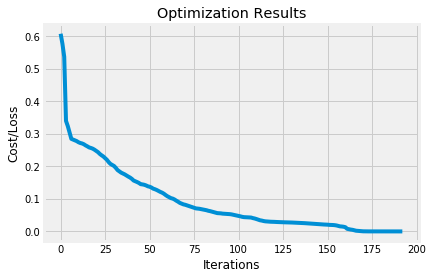

In [13]:
N.plot_cost()

In [14]:
N.compute_accuracy(X_test, y_test)

0.8982300884955752

In [15]:
N2 = DNN(shape=[9, 25, 35, 8, 2])
N2.train(X_train, y_train)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 117
         Function evaluations: 127
         Gradient evaluations: 127


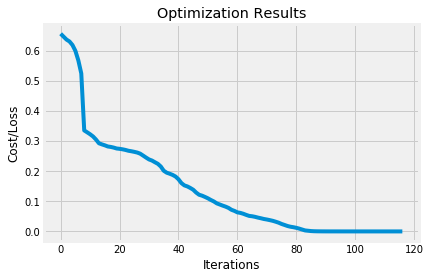

In [16]:
N2.plot_cost()

In [17]:
N2.compute_accuracy(X_test, y_test)

0.8628318584070797

In [26]:
# compare with sklearns implementation
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 19), random_state=1)

In [27]:
ymlp_train = y_train.argmax(axis=1)
ymlp_test = y_test.argmax(axis=1)

ymlp_train[:3], ymlp_test[:3]

(array([1, 0, 1], dtype=int64), array([0, 1, 1], dtype=int64))

In [28]:
clf.fit(X_train, ymlp_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 19), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [29]:
accuracy_score(ymlp_test, clf.predict(X_test)), N.compute_accuracy(X_test, y_test)

(0.911504424778761, 0.8982300884955752)

In [30]:
np.round(clf.predict_proba(X_test), 3)[:10]

array([[0.895, 0.105],
       [0.001, 0.999],
       [0.021, 0.979],
       [0.014, 0.986],
       [0.001, 0.999],
       [0.016, 0.984],
       [0.826, 0.174],
       [0.615, 0.385],
       [0.004, 0.996],
       [0.004, 0.996]])

In [31]:
np.round(N.y_hat, 2)[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [32]:
np.round(clf.coefs_[0], 2)

array([[-0.08,  0.85, -0.74, -0.51,  0.77, -0.45, -0.37, -0.29, -0.1 ,
         0.04, -0.82, -1.21, -0.62,  2.22, -0.47],
       [ 0.17, -0.01, -0.27, -0.67,  3.39,  0.23,  0.32, -0.01,  0.19,
         0.38, -0.39,  0.21,  1.19, -3.38,  0.38],
       [-0.4 ,  1.18,  0.18, -0.31,  1.07, -0.25, -0.  ,  0.86, -0.48,
         0.25, -0.23,  0.84, -0.17, -0.02, -0.4 ],
       [-0.05,  1.12, -0.46, -0.45,  0.  , -0.53,  0.09,  0.27, -0.23,
        -0.01, -0.76, -0.44, -0.78, -0.71,  0.2 ],
       [-0.4 ,  0.53,  0.14, -0.26, -2.4 , -0.03,  0.1 ,  1.05,  0.44,
         0.09,  0.12,  0.59, -2.27,  1.99, -0.1 ],
       [-0.33, -2.07, -0.38, -0.05, -1.33,  0.27, -0.11,  0.88, -0.15,
        -0.23, -0.57, -0.71,  5.31,  1.13,  0.12],
       [-0.39,  4.75, -0.24, -0.22,  0.85, -0.34,  0.15,  0.45, -0.5 ,
         0.12, -0.65,  0.08, -1.43,  5.35,  0.41],
       [ 0.12,  1.28,  0.03, -0.14,  0.96, -0.34, -0.51,  1.56,  0.2 ,
        -0.43, -0.38,  1.53,  0.8 ,  0.26, -0.38],
       [-0.48, -1.45, -0

In [33]:
np.round(N.Ws[0], 2)

array([[ 1.540e+00,  1.140e+00, -6.500e-01,  7.250e+00,  2.350e+00,
        -1.760e+00,  5.100e+00, -2.360e+00, -6.790e+00,  1.232e+01,
         6.030e+00, -1.460e+01,  1.699e+01, -2.480e+00,  7.410e+00],
       [ 3.250e+00,  5.320e+00, -3.400e-01,  5.640e+00, -8.600e+00,
        -4.630e+00, -2.590e+00, -7.510e+00,  3.830e+00,  1.326e+01,
        -6.310e+00,  9.500e-01, -7.510e+00,  1.830e+00,  2.220e+00],
       [ 5.840e+00,  2.550e+00, -7.000e-01,  7.300e-01,  4.100e+00,
         7.940e+00, -7.600e-01, -5.810e+00,  1.530e+00,  5.700e-01,
         2.600e+00,  1.180e+00, -4.100e+00,  1.550e+00, -2.200e-01],
       [-3.370e+00, -3.320e+00,  1.600e-01,  1.136e+01, -7.600e-01,
         7.180e+00,  3.650e+00,  2.870e+00, -2.610e+00,  6.940e+00,
         8.610e+00, -6.830e+00,  6.750e+00, -4.400e+00,  9.240e+00],
       [ 1.340e+00, -1.590e+00, -9.300e-01,  2.700e+00,  6.900e-01,
         6.800e-01,  7.950e+00,  7.300e+00, -7.400e+00,  1.010e+00,
         6.320e+00,  1.560e+00,  1.320e+00, 